# Data Description 
1-id: unique identifier

2-gender: "Male", "Female"

3-age: age of the patient

4-hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5-heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6-ever_married: "No" or "Yes"

7-work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8-Residence_type: "Rural" or "Urban"

9-avg_glucose_level: average glucose level in blood

10-bmi: body mass index

11-smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12-stroke: 1 if the patient had a stroke or 0 if not

#  import libraries


In [1]:
import pandas as pd  #We use the panda to treat the big datasets 
import numpy as np  # we use it to make it easier to work with arrays
import matplotlib.pyplot as plt # we use it to data visualization and graphical ploting
import missingno as msno # we use it to visualize the missing values
import seaborn as sns # use for visualize the Data
from sklearn.model_selection import train_test_split # for predectin process 
from sklearn.metrics import accuracy_score #for predectin process 
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from keras.models import Sequential
from keras.layers import Dense

# Let’s now to import the csv file 

In [2]:
dataSet = pd.read_csv('healthcare-dataset-stroke-data.csv', delimiter = ',', encoding = 'utf-8')
dataSet.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
dataSet = dataSet.drop(['id'],axis=1)

# Data Cleansing 
## 1- Handling the missing values:
### Visualize the missing data with  "missingno lib"

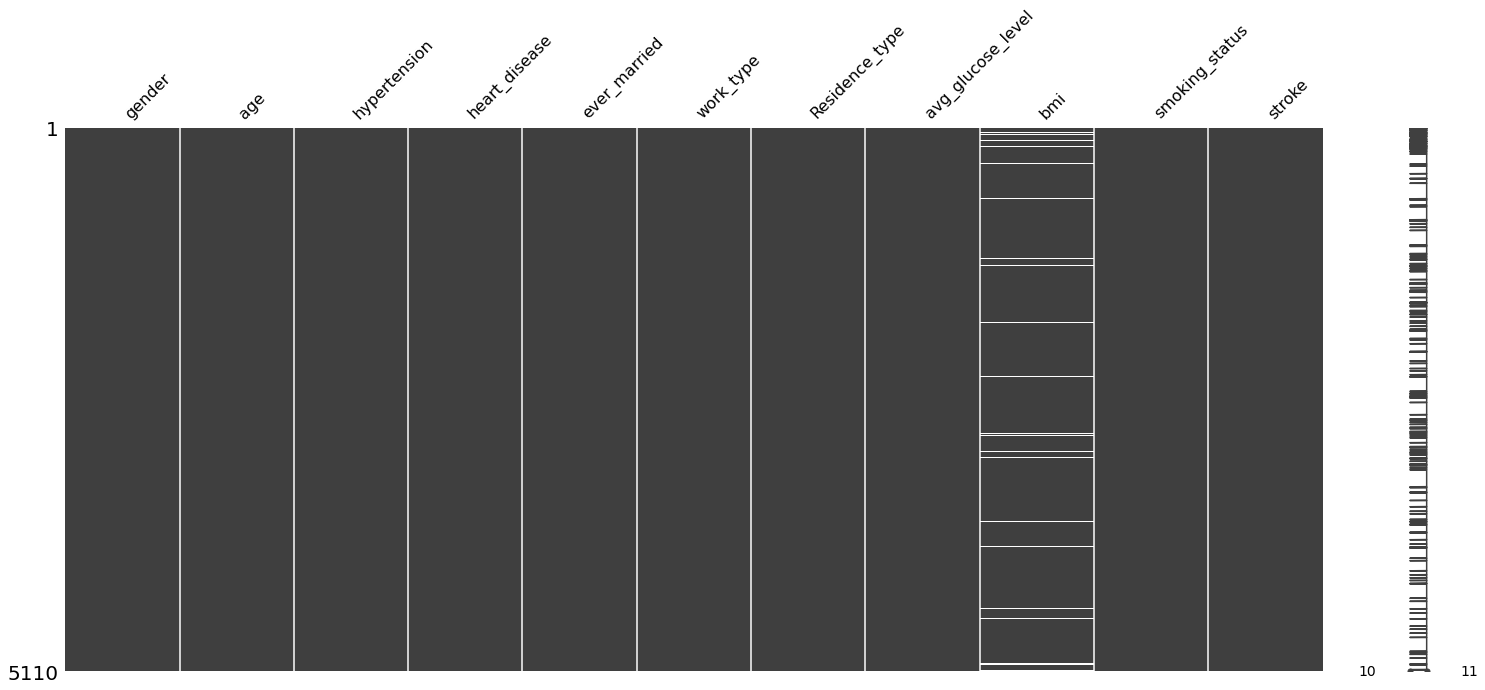

In [4]:
msno.matrix(dataSet);

In [5]:
dataSet.isnull().sum().sort_values(ascending = False) # take the count of missing values

bmi                  201
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
smoking_status         0
stroke                 0
dtype: int64

In [6]:
dataSet['bmi'] = dataSet['bmi'].fillna(round (dataSet['bmi'].median(), 2))
dataSet.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

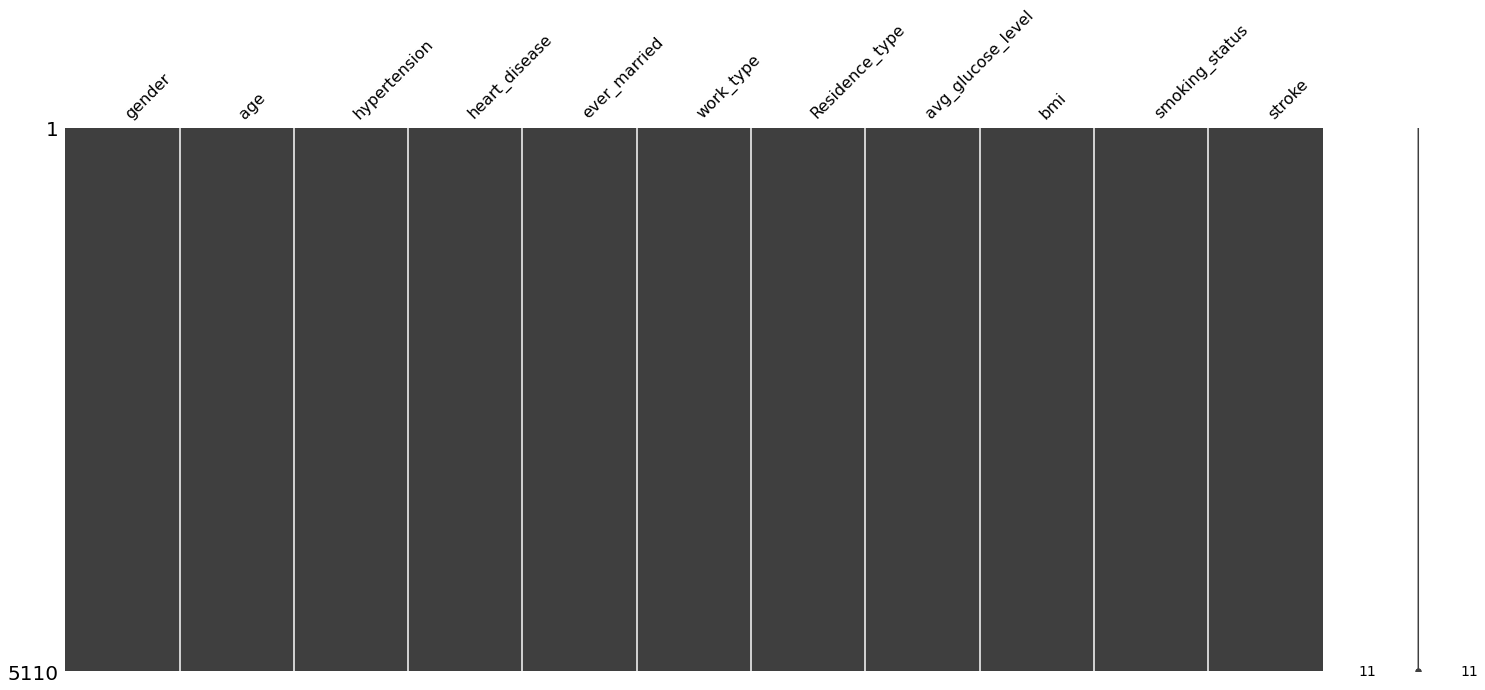

In [7]:
msno.matrix(dataSet);

Text(0, 0.5, 'values')

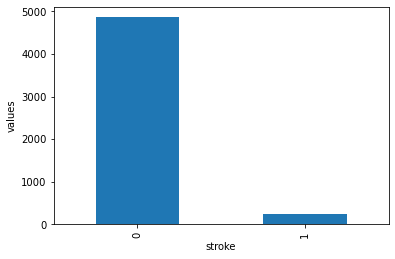

In [8]:
dataSet['stroke'].value_counts().plot.bar() #Data are not balanced
plt.xlabel('stroke')
plt.ylabel('values')

Text(0, 0.5, 'values')

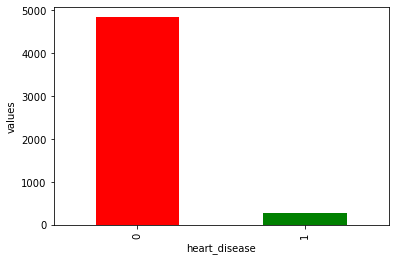

In [9]:
dataSet['heart_disease'].value_counts().plot.bar(color=['red', 'green','blue']) #most passengers wanted to visit TRAPIST-1e
plt.xlabel('heart_disease')
plt.ylabel('values')

Text(0, 0.5, 'values')

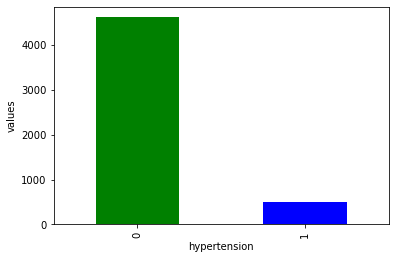

In [10]:
dataSet['hypertension'].value_counts().plot.bar(color=[ 'green','blue']) #most passengers wanted to visit TRAPIST-1e
plt.xlabel('hypertension')
plt.ylabel('values')


In [11]:
dataSet['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [12]:
# Replacing binary categorical data

dataSet['gender']= dataSet['gender'].replace({'Male': 1})
dataSet['gender']= dataSet['gender'].replace({'Female': 0})
dataSet['gender']= dataSet['gender'].replace({'Other': 2})

dataSet['Residence_type']= dataSet['Residence_type'].replace({'Urban': 0})
dataSet['Residence_type']= dataSet['Residence_type'].replace({'Rural': 1})

dataSet['ever_married']= dataSet['ever_married'].replace({'Yes': 0})
dataSet['ever_married']= dataSet['ever_married'].replace({'No': 1})

dataSet['work_type']= dataSet['work_type'].replace({'Private': 0})
dataSet['work_type']= dataSet['work_type'].replace({'Self-employed': 1})
dataSet['work_type']= dataSet['work_type'].replace({'Govt_job': 2})
dataSet['work_type']= dataSet['work_type'].replace({'children': 3})
dataSet['work_type']= dataSet['work_type'].replace({'Never_worked': 4})


dataSet['smoking_status']= dataSet['smoking_status'].replace({'Unknown': 0})
dataSet['smoking_status']= dataSet['smoking_status'].replace({'never smoked': 1})
dataSet['smoking_status']= dataSet['smoking_status'].replace({'formerly smoked': 2})
dataSet['smoking_status']= dataSet['smoking_status'].replace({'smokes': 3})


dataSet.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,0,0,0,228.69,36.6,2,1
1,0,61.0,0,0,0,1,1,202.21,28.1,1,1
2,1,80.0,0,1,0,0,1,105.92,32.5,1,1
3,0,49.0,0,0,0,0,0,171.23,34.4,3,1
4,0,79.0,1,0,0,1,1,174.12,24.0,1,1


### Model classfication Creation 

In [13]:
X = dataSet.drop(columns=['stroke'],axis=1)
y = dataSet['stroke']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.75)


# the data are Unbalanced 

In [15]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_train_balanced, y_train_balanced = oversample.fit_resample(X_train, y_train) ## To Avoid Data Leakage ,We Smote only the train set

Text(0, 0.5, 'values')

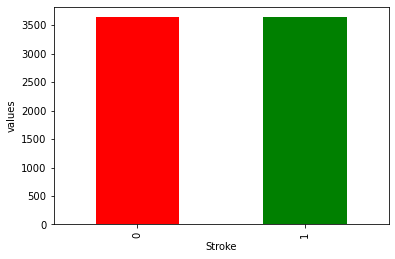

In [16]:
y_train_balanced.value_counts().plot.bar(color=['red','green']) #After Smoting(OverSampling)
plt.xlabel('Stroke')
plt.ylabel('values')

In [17]:
model =RandomForestClassifier(n_estimators=200)
model.fit(X_train_balanced, y_train_balanced)
preds=model.predict(X_test)

In [18]:
print((accuracy_score(y_test, preds)))

0.9006259780907668


In [19]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      1223
           1       0.11      0.18      0.14        55

    accuracy                           0.90      1278
   macro avg       0.54      0.56      0.54      1278
weighted avg       0.93      0.90      0.91      1278



In [20]:
confusion_matrix(y_test, preds)

array([[1141,   82],
       [  45,   10]])

In [21]:
knn = KNeighborsClassifier()
knn.fit(X_train_balanced, y_train_balanced)
predictions = knn.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

0.7965571205007824


In [22]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88      1223
           1       0.11      0.53      0.18        55

    accuracy                           0.80      1278
   macro avg       0.54      0.67      0.53      1278
weighted avg       0.94      0.80      0.85      1278



In [23]:
confusion_matrix(y_test, predictions)

array([[989, 234],
       [ 26,  29]])

### Neural Network Modle

In [24]:
model2 = Sequential()
model2.add(Dense(14, input_dim=10, activation='relu'))
model2.add(Dense(18, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [26]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
model2.fit(X_train_balanced, y_train_balanced, epochs=150, batch_size=10)

Epoch 1/150
728/728 [==============================] - 2s 1ms/step - loss: 0.5317 - accuracy: 0.7444
Epoch 2/150
728/728 [==============================] - 1s 1ms/step - loss: 0.4497 - accuracy: 0.7868
Epoch 3/150
728/728 [==============================] - 1s 1ms/step - loss: 0.4258 - accuracy: 0.7996
Epoch 4/150
728/728 [==============================] - 1s 1ms/step - loss: 0.4230 - accuracy: 0.8031
Epoch 5/150
728/728 [==============================] - 1s 1ms/step - loss: 0.4182 - accuracy: 0.8072
Epoch 6/150
728/728 [==============================] - 1s 1ms/step - loss: 0.4090 - accuracy: 0.8145
Epoch 7/150
728/728 [==============================] - 1s 1ms/step - loss: 0.4069 - accuracy: 0.8121
Epoch 8/150
728/728 [==============================] - 1s 1ms/step - loss: 0.4034 - accuracy: 0.8147
Epoch 9/150
728/728 [==============================] - 1s 1ms/step - loss: 0.4018 - accuracy: 0.8153
Epoch 10/150
728/728 [==============================] - 1s 1ms/step - loss: 0.3985 - accura

728/728 [==============================] - 1s 1ms/step - loss: 0.3400 - accuracy: 0.8457
Epoch 82/150
728/728 [==============================] - 1s 1ms/step - loss: 0.3435 - accuracy: 0.8483
Epoch 83/150
728/728 [==============================] - 1s 1ms/step - loss: 0.3371 - accuracy: 0.8488
Epoch 84/150
728/728 [==============================] - 1s 1ms/step - loss: 0.3387 - accuracy: 0.8498
Epoch 85/150
728/728 [==============================] - 1s 1ms/step - loss: 0.3410 - accuracy: 0.8461
Epoch 86/150
728/728 [==============================] - 1s 1ms/step - loss: 0.3365 - accuracy: 0.8492
Epoch 87/150
728/728 [==============================] - 1s 1ms/step - loss: 0.3360 - accuracy: 0.8513
Epoch 88/150
728/728 [==============================] - 1s 1ms/step - loss: 0.3353 - accuracy: 0.8529
Epoch 89/150
728/728 [==============================] - 1s 1ms/step - loss: 0.3339 - accuracy: 0.8516
Epoch 90/150
728/728 [==============================] - 1s 1ms/step - loss: 0.3379 - accuracy: 

In [34]:
loss,accuracy = model2.evaluate(X_test,y_test)
print('Accuracy: %.2f' % (accuracy*100))
print ('Lose: ',loss)

40/40 [==============================] - 0s 991us/step - loss: 0.4960 - accuracy: 0.7739
Accuracy: 77.39
Lose:  0.49603408575057983
